<h1>TASK 1. ANALYSIS OF UNIVARIATE RANDOM VARIABLES</h1>

<a name='000'></a>

<h2>Content</h2>

<ul>
    <ol type='1'>
    <li><a href='#001'>Substantiation of Chosen Subsample</a></li>
    <li><a href='#002'>Plotting a Non Parametric Estimation of PDF in Form of a Histogram and Using Kernel Density Function</a></li>
    <li><a href='#003'>Order Statistics Estimation and Its Representation as Box with Whiskers Plot</a></li>
    <li><a href='#004'>Selection of Theoretical Distributions That Best Reflect Empirical Data</a></li>
    <li><a href='#005'>Estimation of Random Variable Distribution Parameters Using Maximum Likelihood Technique and LS Methods</a></li>
    <li><a href='#006'>Validation of Empirical and Theoretical Distributions Using Quantile Biplots</a></li>
    <li><a href='#007'>Statistical Tests</a></li>
    </ol>
</ul>

<h2>0. Environment Setup</h2>

<a href='#000'>Back</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings

In [2]:
warnings.filterwarnings(action='ignore')

<a name='001'></a>

<h2>1. Substantiation of Chosen Subsample</h2>

<a href='#000'>Back</a>

Dataset name: Heart Disease Data Set

Dataset source: https://www.kaggle.com/ronitf/heart-disease-uci/version/1

Dataset content:
- age of patient
- sex of patient
- chest pain type
- resting blood pressure
- serum cholestoral
- fasting blood sugar
- resting electrocardiographic results
- maximum heart rate achieved
- exercise induced angina
- ST depression induced by exercise relative to rest
- slope of the peak exercise ST segment
- number of major vessels colored by flourosopy
- thal

In [3]:
df = pd.read_csv('data/data.csv')

In [4]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df = df[['age', 'trestbps', 'chol', 'thalach']]
df.head(10)

,age,trestbps,chol,thalach
0,63,145,233,150
1,37,130,250,187
2,41,130,204,172
3,56,120,236,178
4,57,120,354,163
5,57,140,192,148
6,56,140,294,153
7,44,120,263,173
8,52,172,199,162
9,57,150,168,174


<a name='002'></a>

<h2>2. Plotting a Non Parametric Estimation of PDF in Form of a Histogram and Using Kernel Density Function</h2>

<a href='#000'>Back</a>

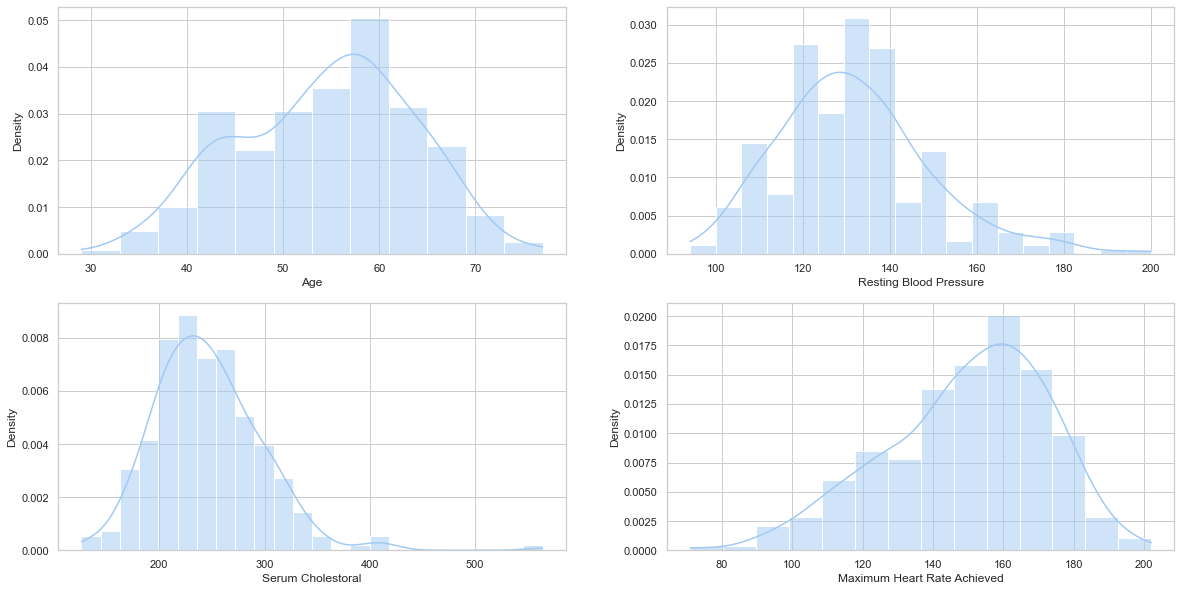

In [8]:
figure, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.set_theme(style='whitegrid', palette='pastel')

age = sns.histplot(df.age, ax=ax[0, 0], kde=True, stat='density')
age.set(xlabel='Age')

trestbps = sns.histplot(df.trestbps, ax=ax[0, 1], kde=True, stat='density')
trestbps.set(xlabel='Resting Blood Pressure')

chol = sns.histplot(df.chol, ax=ax[1, 0], kde=True, stat='density')
chol.set(xlabel='Serum Cholestoral')

thalach = sns.histplot(df.thalach, ax=ax[1, 1], kde=True, stat='density')
thalach.set(xlabel='Maximum Heart Rate Achieved')

plt.show()

<a name='003'></a>

<h2>3. Order Statistics Estimation and Its Representation as Box with Whiskers Plot</h2>

<a href='#000'>Back</a>

In [9]:
def return_quantile(array):
    return np.array([
        np.quantile(array, 0.1),
        np.quantile(array, 0.25),
        np.quantile(array, 0.5),
        np.quantile(array, 0.75),
        np.quantile(array, 0.9)
    ])

def plot_box(array, label):
    figure, ax = plt.subplots(2, 1, figsize=(10, 10))
    sns.set_theme(style='whitegrid', palette='pastel')
    
    histplot = sns.histplot(array, ax=ax[0], kde=False, stat='density')
    boxplot = sns.boxplot(array, ax=ax[1], linewidth=0.5)
    
    histplot.set(xlabel=label)
    boxplot.set(xlabel=label)
    
    quantiles = return_quantile(array.to_numpy())
    for quantile in quantiles:
        ax[0].axvline(quantile, color='black', linestyle='--', alpha=0.75)
        ax[1].axvline(quantile, color='black', linestyle='--', alpha=0.75)
    
    plt.show()

Age of Patient Estimation.

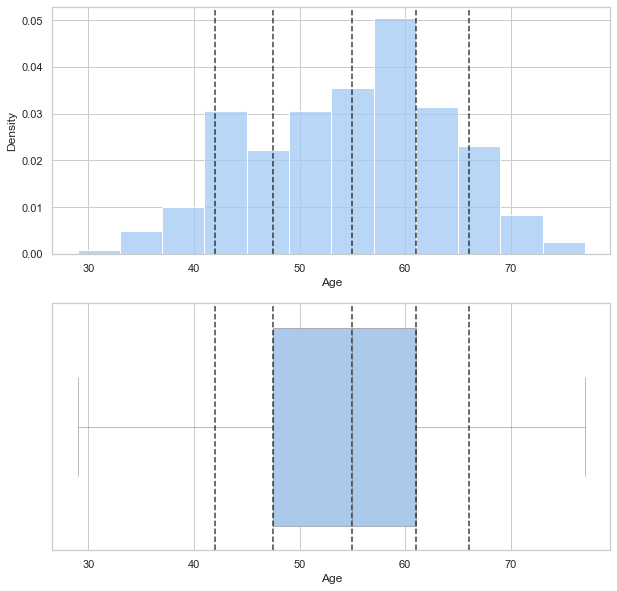

In [10]:
plot_box(df.age, 'Age')

Resting Blood Pressure Estimation.

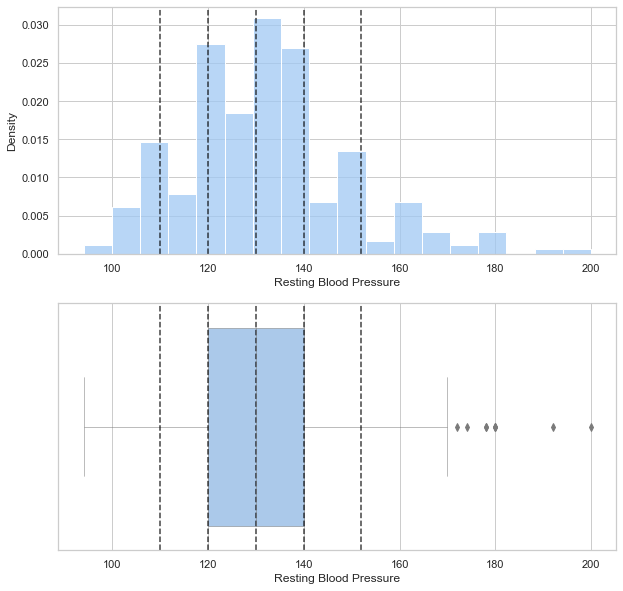

In [11]:
plot_box(df.trestbps, 'Resting Blood Pressure')

Serum Cholestoral Estimation.

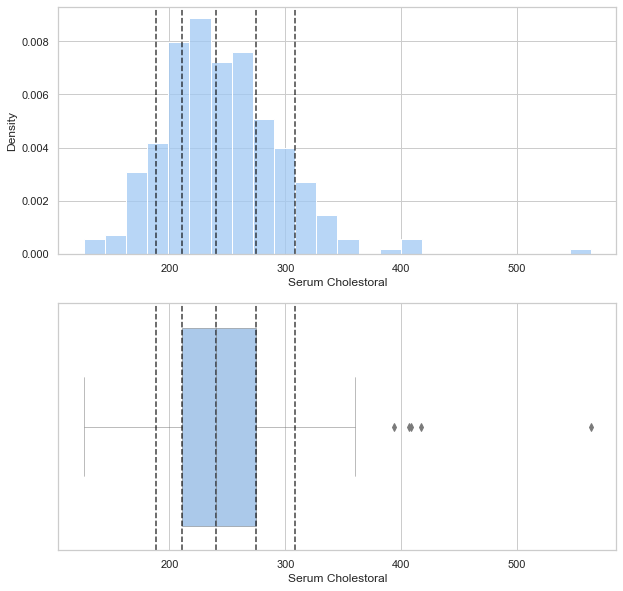

In [12]:
plot_box(df.chol, 'Serum Cholestoral')

Maximum Heart Rate Achieved Estimation.

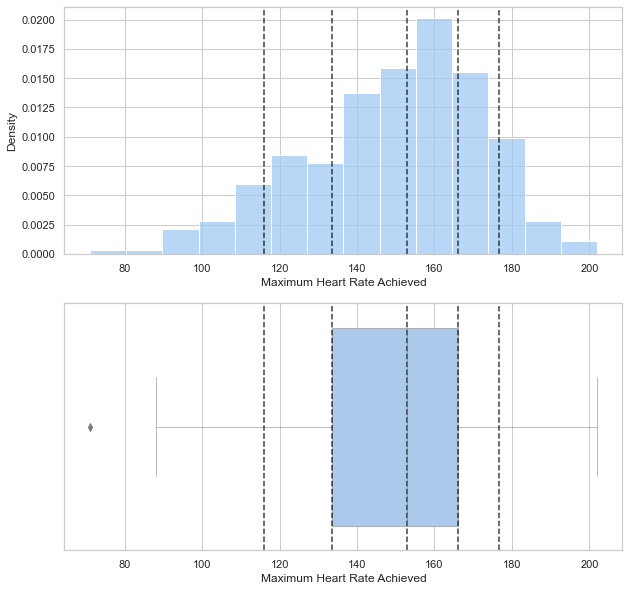

In [13]:
plot_box(df.thalach, 'Maximum Heart Rate Achieved')

<a name='004'></a>

<h2>4. Selection of Theoretical Distributions That Best Reflect Empirical Data</h2>

<a href='#000'>Back</a>

In [14]:
def return_distplot(array, label):
    figure, ax = plt.subplots(1, 1, figsize=(10, 5))
    sns.set_theme(style='whitegrid', palette='pastel')
    
    subplot = sns.histplot(array, kde=False, stat='density')
    subplot.set(xlabel=label)
    
    for distribution in ([scipy.stats.norm, scipy.stats.alpha, scipy.stats.gamma,
                          scipy.stats.laplace, scipy.stats.beta, scipy.stats.chi]):
        
        x_plot = np.linspace(np.min(array), np.max(array), 100)
        args = distribution.fit(array)
        y_plot = distribution.pdf(x_plot, *args)
        
        sns.lineplot(x_plot, y_plot, label=type(distribution).__name__)
        plt.legend()

Age of Patient Estimation.

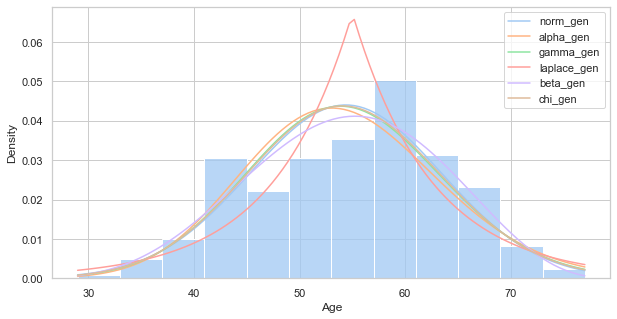

In [15]:
return_distplot(df.age, 'Age')

Resting Blood Pressure Estimation.

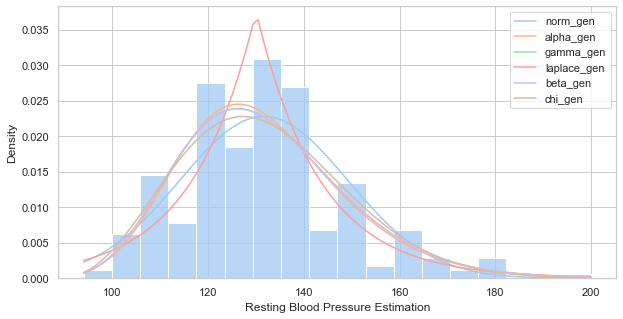

In [16]:
return_distplot(df.trestbps, 'Resting Blood Pressure Estimation')

Serum Cholestoral Estimation.

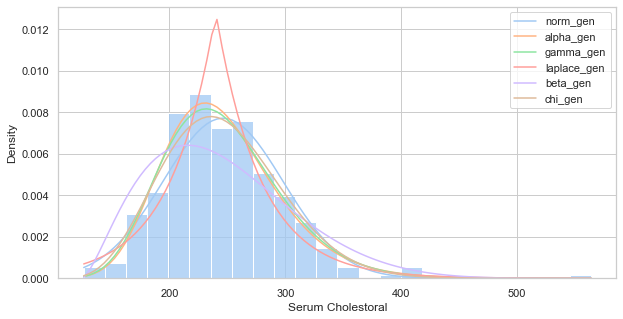

In [17]:
return_distplot(df.chol, 'Serum Cholestoral')

Maximum Heart Rate Achieved Estimation.

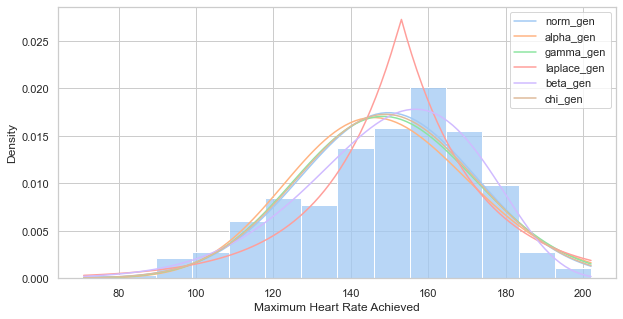

In [18]:
return_distplot(df.thalach, 'Maximum Heart Rate Achieved')

<a name='005'></a>

<h2>5. Estimation of Random Variable Distribution Parameters Using Maximum Likelihood Technique and LS Methods</h2>

<a href='#000'>Back</a>

In [19]:
def return_fit(array):
    mle = scipy.stats.laplace.fit(array, method='MLE')
    mm = scipy.stats.laplace.fit(array, method='MM')
    
    print('Maximum Likelihood Estimation: {:.3f}, {:.3f}'.format(mle[0], mle[1]))
    print('L2 Estimation: {:.3f}, {:.3f}'.format(mm[0], mm[1]))

Age of Patient Estimation.

In [20]:
return_fit(df.age)

Maximum Likelihood Estimation: 55.000, 7.426
L2 Estimation: 54.366, 6.411


Resting Blood Pressure Estimation.

In [21]:
return_fit(df.trestbps)

Maximum Likelihood Estimation: 130.000, 13.314
L2 Estimation: 131.624, 12.381


Serum Cholestoral Estimation.

In [22]:
return_fit(df.chol)

Maximum Likelihood Estimation: 240.000, 39.069
L2 Estimation: 246.264, 36.589


Maximum Heart Rate Achieved Estimation.

In [23]:
return_fit(df.thalach)

Maximum Likelihood Estimation: 153.000, 18.297
L2 Estimation: 149.647, 16.170


<a name='006'></a>

<h2>6. Validation of Empirical and Theoretical Distributions Using Quantile Biplots</h2>

<a href='#000'>Back</a>

In [24]:
def return_biplot(array):
    figure, ax = plt.subplots(1, 1, figsize=(5, 5))
    sns.set_theme(style='whitegrid', palette='pastel')
    
    scipy.stats.probplot(array, dist=scipy.stats.norm, plot=ax)
    
    ax.get_lines()[0].set_marker('o')
    
    ax.get_lines()[1].set_ls('--')
    ax.get_lines()[1].set_color('black')
    ax.get_lines()[1].set_linewidth(0.75)
    
    plt.show()

Age of Patient Estimation.

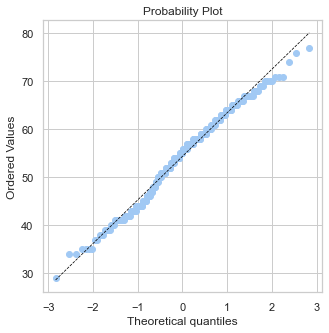

In [25]:
return_biplot(df.age)

Resting Blood Pressure Estimation.

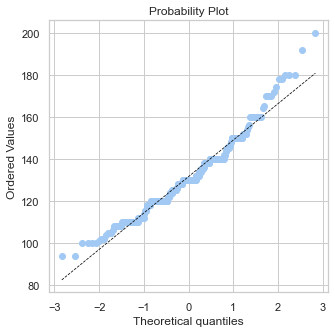

In [26]:
return_biplot(df.trestbps)

Serum Cholestoral Estimation.

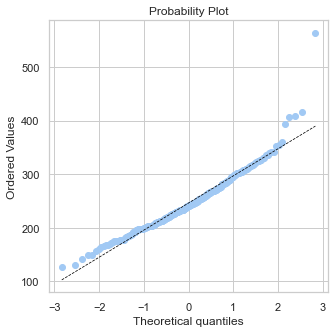

In [27]:
return_biplot(df.chol)

Maximum Heart Rate Achieved Estimation.

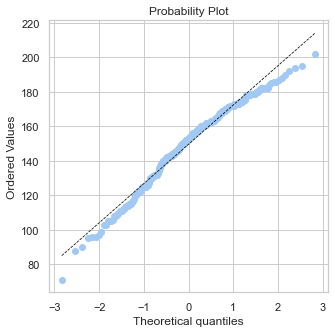

In [28]:
return_biplot(df.thalach)

<a name='007'></a>

<h2>7. Statistical Tests</h2>

<a href='#000'>Back</a>

In [29]:
def return_test(array):
    args = scipy.stats.norm.fit(array)
    
    kstest = scipy.stats.kstest(array, cdf='norm', args=args).pvalue
    cramervonmises = scipy.stats.cramervonmises(array, cdf='norm', args=args).pvalue
    
    print('Kolmogorov-Smirnov Test: {:.5f}'.format(kstest))
    print('Cramer–Von Mises Test: {:.5f}'.format(cramervonmises))

Age of Patient Estimation.

In [30]:
return_test(df.age)

Kolmogorov-Smirnov Test: 0.05562
Cramer–Von Mises Test: 0.17494


Resting Blood Pressure Estimation.

In [31]:
return_test(df.trestbps)

Kolmogorov-Smirnov Test: 0.00352
Cramer–Von Mises Test: 0.06615


Serum Cholestoral Estimation.

In [32]:
return_test(df.chol)

Kolmogorov-Smirnov Test: 0.29951
Cramer–Von Mises Test: 0.16849


Maximum Heart Rate Achieved Estimation.

In [33]:
return_test(df.thalach)

Kolmogorov-Smirnov Test: 0.08616
Cramer–Von Mises Test: 0.07214
